# Project: Shubhayan Bhattacharya, IIT Madras (GroupB, ML)

## Stock Market Data Analysis of Walt Disney

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
my_year_month_fmt = mdates.DateFormatter('%m/%y')
from sklearn.linear_model import LinearRegression

### Reading the csv file for Walt Disney stock market data

In [3]:
stock = pd.read_csv(r"C:\Users\Bisht\Downloads\My assignments\EOD-DIS.csv")

### Data shape and attributes

In [4]:
print(stock.shape)
stock

(1090, 13)


,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,108.00,108.050,107.0600,107.77,3477599.0,0.0,1.0,105.652981,105.701895,104.733409,105.427980,3477599.0
1,2017-12-27,108.42,108.550,107.4550,107.64,5624037.0,0.0,1.0,106.063854,106.191029,105.119825,105.300805,5624037.0
2,2017-12-26,108.49,109.370,107.8900,108.12,3982398.0,0.0,1.0,106.132333,106.993209,105.545372,105.770373,3982398.0
3,2017-12-22,109.40,109.685,108.4500,108.67,7377990.0,0.0,1.0,107.022557,107.301363,106.093202,106.308421,7377990.0
4,2017-12-21,109.52,111.090,109.1892,109.57,9366706.0,0.0,1.0,107.139949,108.675830,106.816338,107.188863,9366706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,2013-09-09,61.60,61.835,61.2700,61.59,7224500.0,0.0,1.0,56.351109,56.566085,56.049228,56.341961,7224500.0
1086,2013-09-06,61.47,61.830,60.6300,61.39,7319400.0,0.0,1.0,56.232186,56.561511,55.463762,56.159003,7319400.0
1087,2013-09-05,61.07,61.600,60.9600,61.30,6356600.0,0.0,1.0,55.866270,56.351109,55.765643,56.076672,6356600.0
1088,2013-09-04,60.92,61.220,60.5200,61.11,14014600.0,0.0,1.0,55.729051,56.003488,55.363135,55.902861,14014600.0


### Description of the data

In [5]:
stock.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.0,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,96.633832,97.284721,95.930802,96.634275,7.624408e+06,0.005954,1.0,91.429171,92.044409,90.764865,91.429532,7.624408e+06
std,13.296325,13.327518,13.221661,13.267403,4.352088e+06,0.070350,0.0,13.581677,13.618915,13.508726,13.556788,4.352088e+06
min,60.920000,61.220000,60.520000,60.930000,2.166034e+06,0.000000,1.0,55.729051,56.003488,55.363135,55.738199,2.166034e+06
25%,89.402500,90.032750,88.920000,89.617500,5.400734e+06,0.000000,1.0,82.852580,83.388091,82.375667,83.067896,5.400734e+06
50%,98.575000,99.175000,98.007500,98.595000,6.658320e+06,0.000000,1.0,94.314657,94.838554,93.577271,94.181547,6.658320e+06
75%,106.945000,107.526250,106.110000,106.940000,8.386674e+06,0.000000,1.0,102.027053,102.664068,101.195108,101.829808,8.386674e+06
max,121.500000,122.080000,120.610000,121.690000,6.090593e+07,1.150000,1.0,114.583303,115.130285,113.743969,114.762487,6.090593e+07


### Checking for any missing values in the data set

In [6]:
stock.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Dividend      0
Split         0
Adj_Open      0
Adj_High      0
Adj_Low       0
Adj_Close     0
Adj_Volume    0
dtype: int64

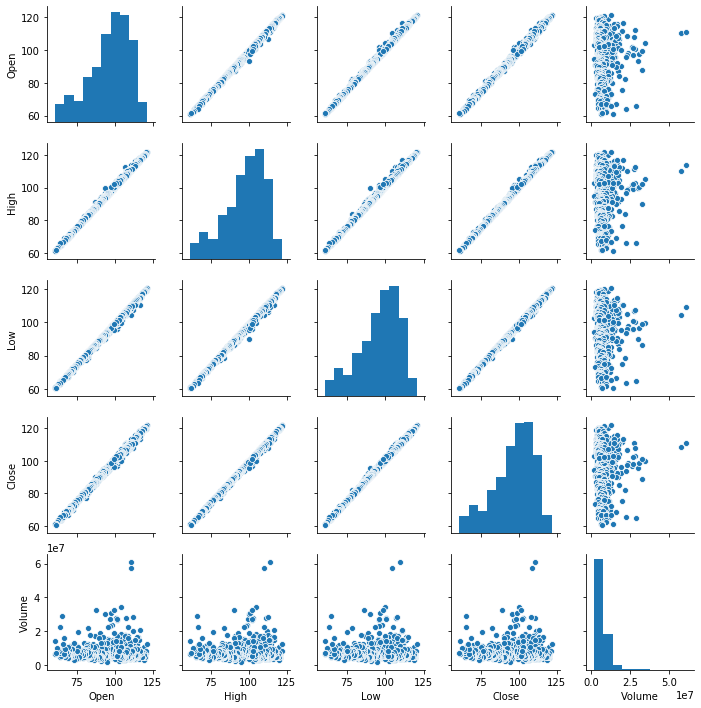

In [7]:
sns.pairplot(stock[['Open',"High","Low","Close", "Volume"]],height=2)

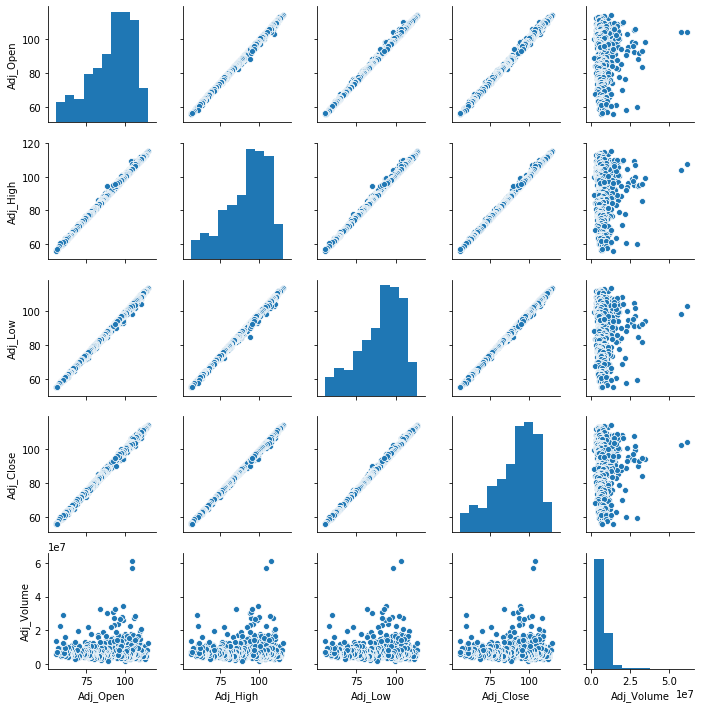

In [8]:
sns.pairplot(stock[['Adj_Open', "Adj_High", "Adj_Low", "Adj_Close", "Adj_Volume"]],height=2)

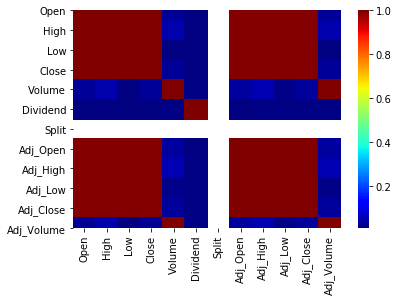

In [9]:
import seaborn as sns
sns.heatmap(stock.corr(),cmap='jet')

### Adjusted closing price as a function of days

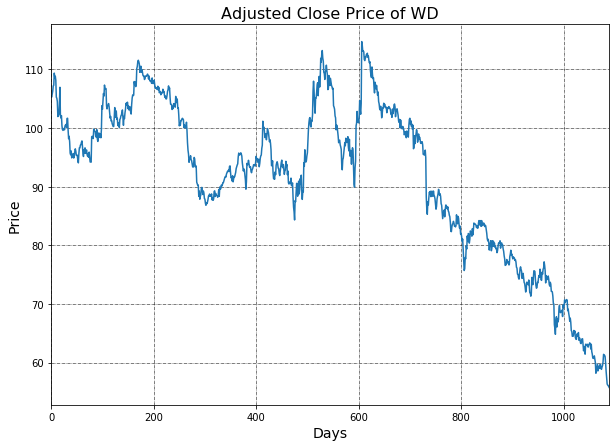

In [10]:
# Define the figure size for the plot
plt.figure(figsize=(10, 7))
# Plot the adjusted close price
stock['Adj_Close'].plot()
# Define the label for the title of the figure
plt.title("Adjusted Close Price of WD", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Days', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [11]:
stock_reduce=stock.drop("Date",axis=1)

In [12]:
# simple moving average calculation
short_rolling = stock_reduce.rolling(window=10).mean()
short_rolling


,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1085,64.930,65.6685,64.520,65.230,12870280.0,0.0,1.0,59.397362,60.072935,59.022298,59.671799,12870280.0
1086,64.516,65.2675,64.092,64.868,10694600.0,0.0,1.0,59.018639,59.706104,58.630767,59.340645,10694600.0
1087,63.984,64.7775,63.648,64.426,10143780.0,0.0,1.0,58.531970,59.257856,58.224600,58.936307,10143780.0
1088,63.409,64.1625,63.079,63.826,10558680.0,0.0,1.0,58.005965,58.695260,57.704084,58.387433,10558680.0


In [13]:
#long window simple moving average
long_rolling = stock.rolling(window=100).mean()
long_rolling.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
1085,69.5121,70.091965,69.048116,69.6100,7260152.0,0.0086,1.0,63.863678,64.396243,63.437225,63.953552,7260152.0
1086,69.4059,69.974015,68.934416,69.4917,7257841.0,0.0086,1.0,63.758382,64.280025,63.325078,63.837059,7257841.0
1087,69.2969,69.867615,68.832816,69.3914,7235359.0,0.0086,1.0,63.650539,64.174529,63.224100,63.737246,7235359.0
1088,69.1835,69.749815,68.715616,69.2737,7320421.0,0.0086,1.0,63.538637,64.058519,63.108725,63.621341,7320421.0
1089,69.0730,69.640615,68.604466,69.1605,7316434.0,0.0086,1.0,63.429365,63.950386,62.998943,63.509623,7316434.0


In [14]:
df=stock

In [15]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target ) shifted 'n' units up
df['Prediction'] = stock[['Adj_Close']]
#print the new data set
print(df.tail())

            Date   Open    High    Low  Close      Volume  Dividend  Split  \
1085  2013-09-09  61.60  61.835  61.27  61.59   7224500.0       0.0    1.0   
1086  2013-09-06  61.47  61.830  60.63  61.39   7319400.0       0.0    1.0   
1087  2013-09-05  61.07  61.600  60.96  61.30   6356600.0       0.0    1.0   
1088  2013-09-04  60.92  61.220  60.52  61.11  14014600.0       0.0    1.0   
1089  2013-09-03  61.42  61.990  60.60  60.93   7016400.0       0.0    1.0   

       Adj_Open   Adj_High    Adj_Low  Adj_Close  Adj_Volume  Prediction  
1085  56.351109  56.566085  56.049228  56.341961   7224500.0   56.341961  
1086  56.232186  56.561511  55.463762  56.159003   7319400.0   56.159003  
1087  55.866270  56.351109  55.765643  56.076672   6356600.0   56.076672  
1088  55.729051  56.003488  55.363135  55.902861  14014600.0   55.902861  
1089  56.186447  56.707877  55.436318  55.738199   7016400.0   55.738199  


## Independent variables and dependent variables

In [16]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X =(df.drop(['Prediction','Date','Open','High','Low','Close','Dividend','Split','Volume','Adj_Close','Adj_Volume'],axis=1))

X2=X.values
y = np.array(df['Prediction'])

## Independent columns

In [17]:
X.columns

Index(['Adj_Open', 'Adj_High', 'Adj_Low'], dtype='object')

## Spiliting data in training and testing set

In [18]:
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

## Logistic regression model

In [19]:
#Create the Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # Create the model
lr.fit(x_train, y_train) #Train the model
print(lr.coef_)
predictions = lr.predict(x_test) #Make predictions on the test data


[-0.44010168  0.74577104  0.69398556]


### Accuracy of the model

In [20]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence (R^2): ", lr_confidence)
from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, predictions))

lr confidence (R^2):  0.9992330190376848
Mean Squared Error (MSE):  0.12891550487297918
